In [4]:
import numpy as np 
import pandas as pd  
from sklearn.decomposition import PCA 
  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [6]:
#MNIST hand written digits dataset

In [7]:
from sklearn import datasets



In [9]:
#dir(datasets)

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()

In [11]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [10]:
plt.imshow(digits.images[0], cmap=plt.cm.green)
//

AttributeError: module 'matplotlib.cm' has no attribute 'green'

In [11]:
data1=pd.DataFrame(digits.data)

In [14]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [12]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [16]:
1797*64

115008

In [5]:
digits.data.shape

NameError: name 'digits' is not defined

In [6]:
digits.images.shape

NameError: name 'digits' is not defined

Docstring:
%%python script magic

Run cells with python in a subprocess.

This is a shortcut for `%%script python`
File:      c:\users\asus\appdata\local\programs\python\python310\lib\site-packages\ipython\core\magics\script.py


In [19]:
1797*20

35940

In [20]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [21]:
#we will just displaying the top 5 images from the data

In [22]:
digits.data[0:6]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [23]:
digits.target[0:6]

array([0, 1, 2, 3, 4, 5])

In [24]:
for i,j in enumerate(['el1','ele2','ele3']):
    print(i)
    print(j)

0
el1
1
ele2
2
ele3


In [25]:
#there are in total 5 list in data tuple:
#(['img1'],['img2'],['img3'],['img4'],['img5']), ([0, 1, 2, 3, 4])

In [26]:
#for the 1st loop. image- 1st image, label- wil take 1st target, index will take 0


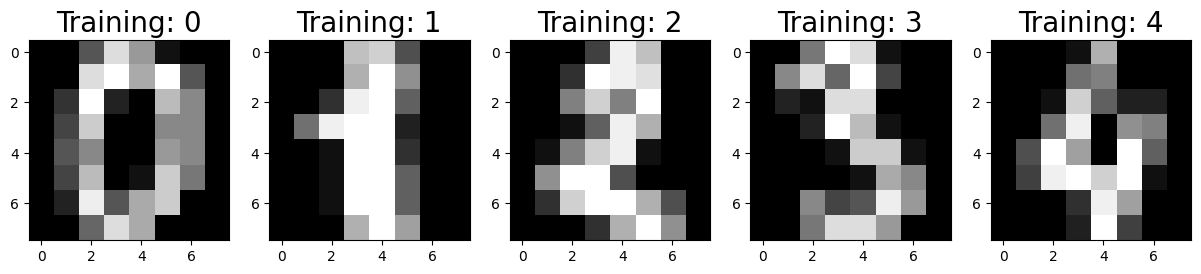

In [27]:
#Displaying some of the images and labels
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f"Training: {label}", fontsize=20 )  

In [28]:
x=digits.data
y=digits.target

In [29]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [30]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [31]:
x.shape

(1797, 64)

In [32]:
y.shape

(1797,)

In [33]:
#salary-- 10k- to 1l
#age-- 20 to 70
#height-- 120 to 200

#target-- anual salary

In [34]:
#StandardScaler-- will always have sd-1 and mean-0
#-1 to +1

In [35]:
from sklearn.preprocessing import StandardScaler
# Data Normalization
X_std = StandardScaler().fit_transform(x)

In [36]:
X_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [37]:
X_std.shape

(1797, 64)

In [38]:
x1=X_std.T
x1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [39]:
x1.shape

(64, 1797)

In [40]:
cov_mat = np.cov(X_std.T)

In [41]:
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [42]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)#

In [43]:
eig_vals

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.05037444, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [44]:
#eig_vecs

In [45]:
# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
var_exp

[12.033916097734913,
 9.561054403097884,
 8.444414892624557,
 6.498407907524159,
 4.860154875966397,
 4.214119869271938,
 3.9420828035673843,
 3.3893809246383464,
 2.998221011625225,
 2.9320025512522196,
 2.781805463550333,
 2.5770550925819964,
 2.2753033157642566,
 2.227179739514341,
 2.1652294318492515,
 1.9141666064421297,
 1.7755470851681912,
 1.6380692742844243,
 1.596460168862344,
 1.489191187087821,
 1.3479695658179347,
 1.2719313702347457,
 1.165837350591949,
 1.057646598536318,
 0.975315947198107,
 0.9445589897319975,
 0.863013826970725,
 0.8366428536685141,
 0.7976932484112406,
 0.746471370926062,
 0.7255821513702749,
 0.6919112454811818,
 0.6539085355726169,
 0.6407925738459838,
 0.5913841117223411,
 0.5711624052235216,
 0.5236368034166345,
 0.4818075864451417,
 0.4537192598584498,
 0.42316275323277996,
 0.40605306997903756,
 0.39708480827582654,
 0.35649330314261707,
 0.3407871814703001,
 0.3278353352879542,
 0.31103200734535724,
 0.28857529410893384,
 0.2764892635235465,
 

In [46]:
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

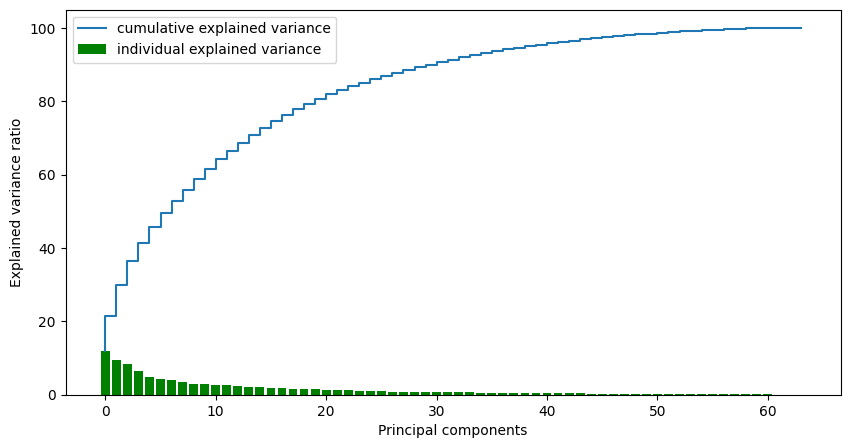

In [47]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y,train_size=0.8)

In [49]:
x_train.shape

(1437, 64)

In [50]:
x_test.shape

(360, 64)

In [51]:
pca=PCA(n_components=25)
pca_x_train=pca.fit_transform(x_train)
pca_x_test=pca.transform(x_test)

In [52]:
rf=DecisionTreeClassifier().fit(pca_x_train,y_train)

In [53]:
predicted=rf.predict(pca_x_test)

In [54]:
predicted

array([7, 3, 9, 0, 3, 1, 0, 6, 3, 7, 5, 4, 7, 4, 9, 1, 4, 3, 0, 8, 7, 6,
       9, 0, 1, 5, 0, 4, 5, 1, 4, 8, 1, 8, 9, 1, 0, 9, 8, 7, 3, 8, 0, 1,
       0, 7, 7, 1, 4, 7, 1, 6, 8, 2, 3, 6, 5, 6, 6, 4, 3, 0, 7, 3, 1, 3,
       7, 0, 9, 4, 9, 5, 3, 5, 6, 7, 6, 5, 5, 3, 6, 9, 5, 9, 5, 3, 1, 2,
       3, 6, 8, 8, 0, 2, 8, 5, 2, 8, 6, 9, 6, 3, 6, 4, 1, 1, 7, 0, 4, 6,
       3, 7, 4, 3, 6, 1, 0, 2, 7, 4, 0, 8, 7, 2, 4, 5, 1, 3, 0, 5, 8, 1,
       3, 5, 0, 4, 9, 3, 0, 4, 6, 5, 4, 5, 6, 8, 9, 2, 8, 7, 1, 3, 1, 1,
       5, 4, 0, 5, 1, 0, 3, 6, 5, 7, 1, 6, 5, 1, 2, 6, 8, 6, 7, 9, 3, 9,
       8, 6, 3, 2, 3, 3, 1, 6, 5, 8, 4, 3, 6, 6, 4, 2, 3, 6, 3, 7, 3, 9,
       9, 1, 7, 2, 0, 9, 4, 1, 6, 5, 9, 9, 4, 6, 4, 9, 3, 9, 3, 1, 9, 4,
       6, 5, 2, 0, 3, 5, 6, 6, 8, 3, 2, 8, 9, 4, 1, 0, 5, 7, 2, 2, 9, 5,
       3, 4, 4, 6, 1, 2, 4, 5, 0, 2, 8, 6, 3, 7, 1, 3, 1, 5, 7, 4, 8, 7,
       4, 5, 8, 4, 1, 0, 7, 8, 6, 2, 5, 6, 2, 4, 2, 6, 5, 4, 9, 5, 5, 3,
       3, 9, 5, 2, 9, 9, 2, 8, 4, 8, 6, 3, 0, 5, 7,

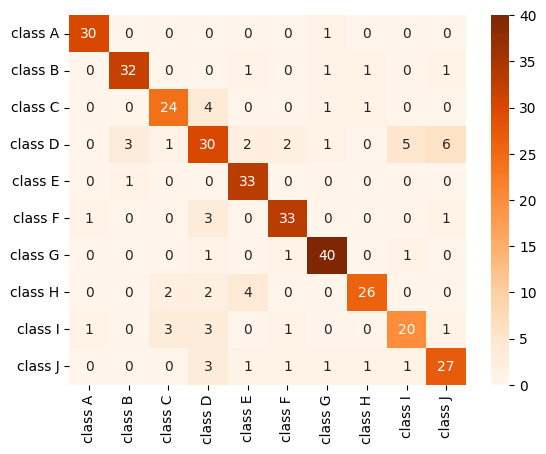

In [71]:
confusion_matrix(predicted,y_test)


from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix



columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

confm = confusion_matrix(y_test, predicted)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Oranges', annot=True)

In [56]:
accuracy_score(predicted,y_test)

0.8194444444444444

In [57]:
predicted

array([7, 3, 9, 0, 3, 1, 0, 6, 3, 7, 5, 4, 7, 4, 9, 1, 4, 3, 0, 8, 7, 6,
       9, 0, 1, 5, 0, 4, 5, 1, 4, 8, 1, 8, 9, 1, 0, 9, 8, 7, 3, 8, 0, 1,
       0, 7, 7, 1, 4, 7, 1, 6, 8, 2, 3, 6, 5, 6, 6, 4, 3, 0, 7, 3, 1, 3,
       7, 0, 9, 4, 9, 5, 3, 5, 6, 7, 6, 5, 5, 3, 6, 9, 5, 9, 5, 3, 1, 2,
       3, 6, 8, 8, 0, 2, 8, 5, 2, 8, 6, 9, 6, 3, 6, 4, 1, 1, 7, 0, 4, 6,
       3, 7, 4, 3, 6, 1, 0, 2, 7, 4, 0, 8, 7, 2, 4, 5, 1, 3, 0, 5, 8, 1,
       3, 5, 0, 4, 9, 3, 0, 4, 6, 5, 4, 5, 6, 8, 9, 2, 8, 7, 1, 3, 1, 1,
       5, 4, 0, 5, 1, 0, 3, 6, 5, 7, 1, 6, 5, 1, 2, 6, 8, 6, 7, 9, 3, 9,
       8, 6, 3, 2, 3, 3, 1, 6, 5, 8, 4, 3, 6, 6, 4, 2, 3, 6, 3, 7, 3, 9,
       9, 1, 7, 2, 0, 9, 4, 1, 6, 5, 9, 9, 4, 6, 4, 9, 3, 9, 3, 1, 9, 4,
       6, 5, 2, 0, 3, 5, 6, 6, 8, 3, 2, 8, 9, 4, 1, 0, 5, 7, 2, 2, 9, 5,
       3, 4, 4, 6, 1, 2, 4, 5, 0, 2, 8, 6, 3, 7, 1, 3, 1, 5, 7, 4, 8, 7,
       4, 5, 8, 4, 1, 0, 7, 8, 6, 2, 5, 6, 2, 4, 2, 6, 5, 4, 9, 5, 5, 3,
       3, 9, 5, 2, 9, 9, 2, 8, 4, 8, 6, 3, 0, 5, 7,

In [58]:
y_test

array([7, 3, 9, 0, 3, 1, 0, 6, 3, 7, 5, 9, 1, 4, 3, 1, 7, 9, 0, 8, 7, 6,
       9, 0, 1, 3, 0, 3, 5, 1, 4, 9, 1, 3, 9, 3, 0, 9, 8, 7, 3, 6, 0, 1,
       5, 7, 7, 1, 4, 7, 1, 6, 8, 2, 3, 6, 5, 6, 6, 4, 3, 0, 7, 3, 1, 3,
       7, 8, 9, 4, 9, 5, 3, 5, 6, 7, 6, 5, 5, 8, 6, 9, 6, 9, 5, 8, 1, 2,
       9, 6, 8, 8, 0, 2, 8, 5, 2, 8, 6, 3, 6, 3, 6, 4, 1, 1, 7, 0, 4, 6,
       5, 7, 4, 7, 6, 1, 0, 2, 7, 7, 0, 3, 7, 3, 4, 5, 3, 3, 0, 5, 3, 1,
       3, 5, 0, 4, 9, 3, 0, 4, 6, 5, 4, 5, 6, 8, 9, 2, 8, 7, 1, 3, 1, 1,
       8, 7, 0, 5, 1, 0, 3, 6, 5, 7, 1, 6, 5, 4, 7, 9, 8, 6, 7, 5, 3, 9,
       8, 6, 6, 2, 2, 3, 1, 6, 5, 3, 4, 3, 6, 6, 4, 2, 2, 6, 3, 7, 3, 9,
       9, 3, 7, 8, 0, 9, 4, 1, 6, 5, 9, 9, 4, 6, 7, 9, 8, 9, 3, 1, 3, 4,
       6, 5, 2, 0, 3, 5, 6, 3, 8, 3, 2, 8, 9, 4, 1, 0, 5, 7, 2, 8, 9, 5,
       5, 4, 4, 6, 1, 2, 4, 5, 0, 2, 8, 1, 3, 7, 1, 9, 1, 5, 7, 4, 8, 2,
       4, 3, 8, 4, 1, 0, 7, 3, 6, 2, 5, 6, 2, 4, 2, 6, 5, 4, 9, 5, 5, 3,
       3, 9, 5, 2, 9, 3, 2, 8, 4, 8, 6, 7, 0, 5, 9,

In [59]:
def get_misclassified_index(y_pred,y_test):
    misclassification=[]
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
    return misclassification

In [60]:
misclassification=get_misclassified_index(predicted,y_test)

In [61]:
len(misclassification)

65

In [62]:
misclassification[0:5]

[11, 12, 14, 16, 17]

In [67]:
def plot_misclassification(misclassification):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(pca_x_test[wrong],(5,5)),cmap=plt.cm.gray)
        plt.title('predicted:{}Actual:{}'.format(predicted[wrong],y_test[wrong]))

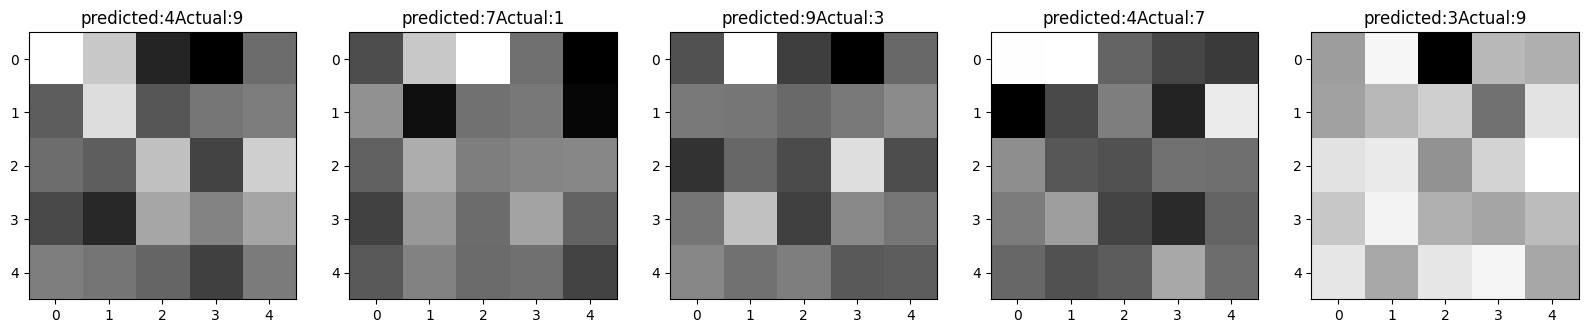

In [68]:
plot_misclassification(misclassification)